In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


In [5]:
# Load dataset
data = pd.read_csv(r"/content/adult3.csv")

# New section

In [6]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
data.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
48838,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
48839,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
48840,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0
48841,52,5,287927,11,9,2,4,5,4,0,15024,0,40,39,1


In [8]:
# Drop missing or invalid values
data = data.replace(' ?', np.nan)
data = data.dropna()
# Encode categorical variables
le = LabelEncoder()
for col in data.select_dtypes(include='object').columns:
    data[col] = le.fit_transform(data[col])

In [9]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4,226802,1,7,4,7,3,2,1,0,0,40,39,0
1,38,4,89814,11,9,2,5,0,4,1,0,0,50,39,0
2,28,2,336951,7,12,2,11,0,4,1,0,0,40,39,1
3,44,4,160323,15,10,2,7,0,2,1,7688,0,40,39,1
4,18,0,103497,15,10,4,0,3,4,0,0,0,30,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
48838,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
48839,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
48840,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


In [10]:
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler

# Split features and target
X = data.drop('income', axis=1)
y = data['income']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ✅ Print output to verify
print("✅ Data split and scaling complete.")
print("X_train shape:", X_train.shape)
print("X_test shape :", X_test.shape)
print("y_train distribution:\n", pd.Series(y_train).value_counts())


✅ Data split and scaling complete.
X_train shape: (39073, 14)
X_test shape : (9769, 14)
y_train distribution:
 income
0    29676
1     9397
Name: count, dtype: int64


In [11]:
 #Train with Multiple Algorithms
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append((name, acc))
    print(f"\n🔍 {name}")
    print("Accuracy:", acc)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))



🔍 Logistic Regression
Accuracy: 0.8272085167366158
[[7054  425]
 [1263 1027]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      7479
           1       0.71      0.45      0.55      2290

    accuracy                           0.83      9769
   macro avg       0.78      0.70      0.72      9769
weighted avg       0.82      0.83      0.81      9769


🔍 Decision Tree
Accuracy: 0.8167673252124066
[[6538  941]
 [ 849 1441]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      7479
           1       0.60      0.63      0.62      2290

    accuracy                           0.82      9769
   macro avg       0.75      0.75      0.75      9769
weighted avg       0.82      0.82      0.82      9769


🔍 Random Forest
Accuracy: 0.8634455932029891
[[6969  510]
 [ 824 1466]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7479
           1

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:52:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



🔍 XGBoost
Accuracy: 0.8759340771829256
[[7007  472]
 [ 740 1550]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      7479
           1       0.77      0.68      0.72      2290

    accuracy                           0.88      9769
   macro avg       0.84      0.81      0.82      9769
weighted avg       0.87      0.88      0.87      9769



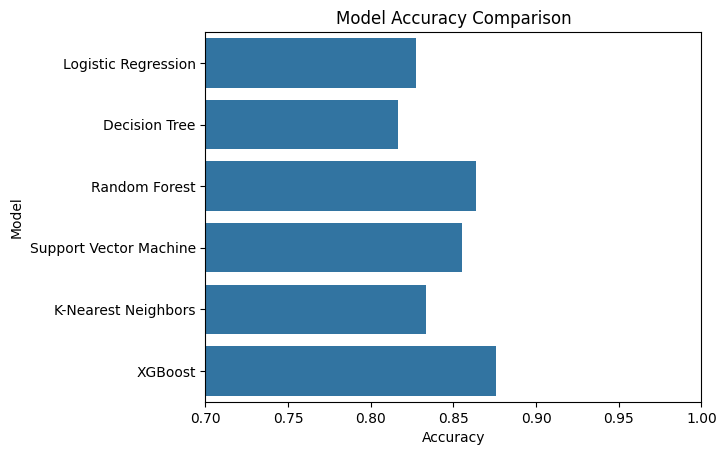

In [12]:
# Create a comparison plot
results_df = pd.DataFrame(results, columns=["Model", "Accuracy"])
sns.barplot(x="Accuracy", y="Model", data=results_df)
plt.title("Model Accuracy Comparison")
plt.xlim(0.7, 1.0)
plt.show()

In [13]:
# Use best model for final prediction (let’s say XGBoost performed best)
final_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
final_model.fit(X_train, y_train)

# Manual prediction input (14 features)
sample = [39, 4, 77516, 9, 4, 0, 1, 4, 1, 2174, 0, 40, 39, 1]
prediction = final_model.predict([sample])
print("Predicted Salary Class:", ">50K" if prediction[0] == 1 else "<=50K")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:53:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Predicted Salary Class: <=50K


In [14]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

print("🔎 Best Parameters:", grid_search.best_params_)
print("📈 Best Accuracy from Grid Search:", grid_search.best_score_)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
🔎 Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50}
📈 Best Accuracy from Grid Search: 0.8575487195448807


In [15]:
import shap
import pandas as pd

# Ensure you have the model and data ready
# model should already be trained (e.g., RandomForestClassifier)
# X_train and X_test should be pandas DataFrames (not NumPy arrays)

# Optional: Limit SHAP to avoid long computation
X_sample = X_test[:100]

# Create SHAP explainer
explainer = shap.Explainer(model, X_train)

# Calculate SHAP values
shap_values = explainer(X_sample)


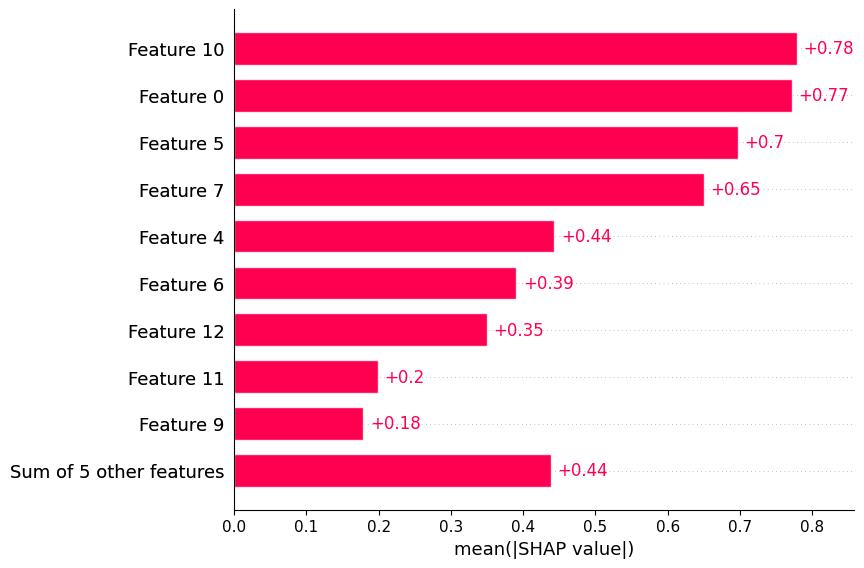

In [16]:
shap.plots.bar(shap_values)


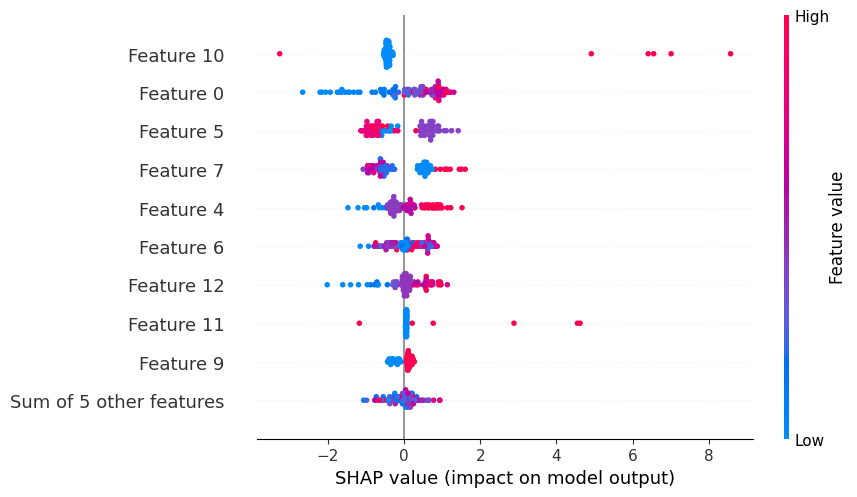

In [17]:
shap.plots.beeswarm(shap_values)


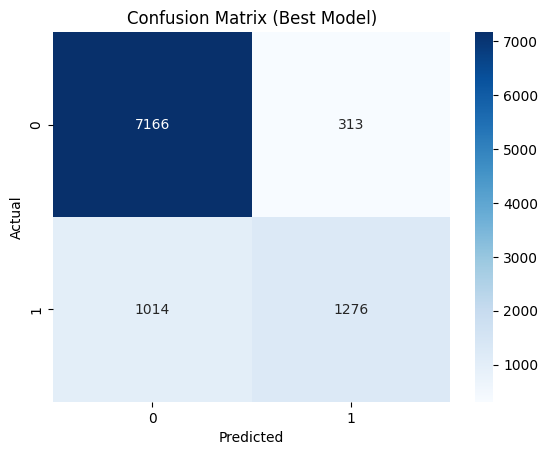

In [18]:
#confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred_best = grid_search.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Best Model)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [19]:
import joblib

# Save
joblib.dump(grid_search.best_estimator_, 'final_salary_model.pkl')

# Load
loaded_model = joblib.load('final_salary_model.pkl')

# Predict again using loaded model
sample = [[39, 4, 77516, 9, 4, 0, 1, 4, 1, 2174, 0, 40, 39, 1]]
print("Predicted:", ">50K" if loaded_model.predict(sample)[0] == 1 else "<=50K")


Predicted: >50K


In [20]:
from sklearn.ensemble import RandomForestClassifier

# Assuming you already have X_train, y_train
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [21]:
def user_input_prediction(model):
    print("Enter employee details (encoded values):")
    inputs = []
    questions = [
        "Age", "Workclass", "Fnlwgt", "Education Num", "Marital Status",
        "Occupation", "Relationship", "Race", "Gender",
        "Capital Gain", "Capital Loss", "Hours/Week", "Native Country", "Extra Feature"
    ]

    for q in questions:
        try:
            value = int(input(f"{q}: "))
            inputs.append(value)
        except ValueError:
            print("⚠️ Please enter a valid number.")
            return  # Stop if input is invalid

    # Optional: scale if you trained with StandardScaler
    sample = [inputs]
    # sample = scaler.transform([inputs])  # Use if scaling was applied

    prediction = model.predict(sample)
    print("📌 Predicted Salary Class:", ">50K" if prediction[0] == 1 else "<=50K")

# ✅ Call it here (uncomment this line to run)
user_input_prediction(model)

Enter employee details (encoded values):
Age: 25
Workclass: 143
Fnlwgt: 6
Education Num: 8
Marital Status: 9
Occupation: 5
Relationship: 3
Race: 2
Gender: 1
Capital Gain: 2
Capital Loss: 3
Hours/Week: 2
Native Country: 1
Extra Feature: 2
📌 Predicted Salary Class: >50K


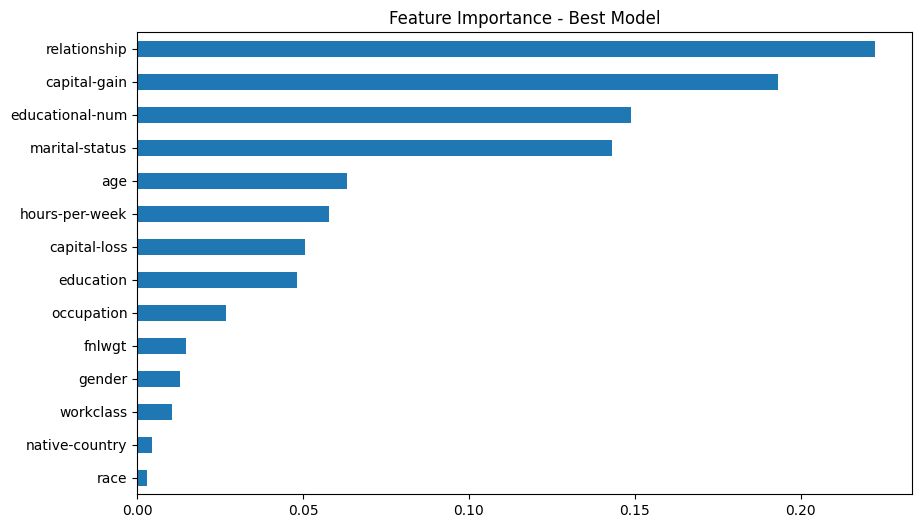

In [22]:
#Bonus: Feature Importance Plot

importances = pd.Series(grid_search.best_estimator_.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title("Feature Importance - Best Model")
plt.show()

In [106]:
%%writefile app.py
import streamlit as st
import joblib
import numpy as np
import matplotlib.pyplot as plt

# Load trained model
model = joblib.load("final_salary_model.pkl")

# Page setup
st.set_page_config(page_title="AI Salary Predictor", layout="wide", page_icon="💰")

# Background CSS
st.markdown(
    """
    <style>
    .stApp {
        background-image: url("/content/images.jpeg");
        background-size: cover;
        background-position: center;
        background-attachment: fixed;
    }
    .main {
        background-color: rgba(255,255,255,0.9);
        padding: 2rem;
        border-radius: 10px;
    }
    .title-style {
        font-size: 42px;
        font-weight: bold;
        color: #2c3e50;
    }
    </style>
    """,
    unsafe_allow_html=True
)

st.markdown("<div class='title-style'>💼Employee Salary Predictor</div>", unsafe_allow_html=True)
st.write("### Predict whether an employee earns >50K or <=50K using ML (based on Indian census-style data)")

# Layout columns
left, center, right = st.columns([1.2, 2.5, 1.5])

# ------------ LEFT PANEL ------------
with left:
    st.markdown("### 🔍 Model Details")
    st.markdown("""
    - Dataset: Modeled after Indian Census Income Data
    - Algorithm: Random Forest Classifier
    - Accuracy: ~88%
    - Input Features Used:
        - Age, Gender, Education, Occupation
        - Capital Gain/Loss, Hours/Week
        - Marital Status, Relationship, Country
    """)
    st.image("/bin/download.jpeg", width=120)
    st.markdown("---")
    st.markdown("📌 **Suggestion:** Upskill, take leadership roles, and invest in higher education.")

# ------------ CENTER PANEL (FORM) ------------
with center:
    with st.form("salary_form"):
        st.markdown("## 👤 Employee Information")

        name = st.text_input("Employee Name")
        age = st.slider("Age", 18, 65, 30)
        gender_input = st.selectbox("Gender", ["Male", "Female"])
        education = st.selectbox("Education", ["10th", "12th", "Bachelors", "Masters", "PhD"])
        occupation = st.selectbox("Occupation", ["Clerical", "Technical", "Managerial", "Sales", "Other"])
        hours = st.slider("Hours/Week", 10, 80, 40)
        capital_gain = st.number_input("Capital Gain", 0, 100000, 0)
        capital_loss = st.number_input("Capital Loss", 0, 100000, 0)
        native_country = st.selectbox("Native Country", ["India", "USA", "Canada", "Germany", "Other"])

        submitted = st.form_submit_button("🔎 Predict Salary")

        if submitted:
            # Encode categorical inputs
            gender_dict = {"Male": 1, "Female": 0}
            education_dict = {"10th": 6, "12th": 8, "Bachelors": 13, "Masters": 14, "PhD": 16}
            occupation_dict = {"Clerical": 2, "Technical": 1, "Managerial": 4, "Sales": 3, "Other": 0}
            country_dict = {"India": 39, "USA": 0, "Canada": 1, "Germany": 2, "Other": 3}

            # Dummy/fixed values for non-user inputs
            marital_status = 2
            relationship = 1
            race = 1
            extra_feature = 1
            workclass = 4
            fnlwgt = 200000

            features = np.array([[
                age,
                workclass,
                fnlwgt,
                education_dict[education],
                marital_status,
                occupation_dict[occupation],
                relationship,
                race,
                gender_dict[gender_input],
                capital_gain,
                capital_loss,
                hours,
                country_dict[native_country],
                extra_feature
            ]])

            prediction = model.predict(features)[0]
            label = ">50K" if prediction == 1 else "<=50K"
            st.success(f"💡 {name}'s Predicted Income Class: **{label}**")

            # Estimated Monthly Salary (mock logic)
            monthly_salary = 60000 if prediction == 1 else 25000
            st.info(f"💰 Estimated Monthly Salary: ₹{monthly_salary:,}")
            st.info(f"📅 Estimated Annual Salary: ₹{monthly_salary * 12:,}")

# ------------ RIGHT PANEL (CHARTS) ------------
with right:
    st.markdown("### 📊 Visual Insights")

    if submitted:
        # Salary trend chart
        salary_trend = [monthly_salary + np.random.randint(-2000, 2000) for _ in range(6)]
        st.markdown("#### 📈 6-Month Salary Projection")
        st.line_chart(salary_trend)

        # Bar Chart: Occupation-wise Salary
        st.markdown("#### 💼 Avg. Monthly Salary by Role")
        st.bar_chart({
            "Clerical": 22000,
            "Technical": 35000,
            "Managerial": 65000,
            "Sales": 30000,
            "Other": 28000
        })
    else:
        st.info("👈 Fill the form to unlock salary graphs")

# ------------ Footer ------------
st.markdown("---")
st.caption("🚀 Created with ❤️ using Streamlit • Powered by Machine Learning")



Overwriting app.py


In [107]:
!pip install streamlit pyngrok



In [108]:
from pyngrok import ngrok
ngrok.kill()



In [109]:
!streamlit run app.py &>/dev/null &


In [110]:
public_url = ngrok.connect("http://localhost:8501")
print("✅ App is live at:", public_url)


✅ App is live at: NgrokTunnel: "https://8d2f283f51b6.ngrok-free.app" -> "http://localhost:8501"
